##### Importing library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# importing a csv file
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\VNL2023.csv')

In [30]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [31]:
df.shape

(131, 10)

##### Statistical Data of Projects

In [32]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


##### Checking for NaN values 

In [33]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

##### Checking for duplicate rows

In [34]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool

##### Correlation

In [35]:
numeric_cols = df.select_dtypes(include = ["int" , "float"]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


##### Correlation Matrix using Heatmap

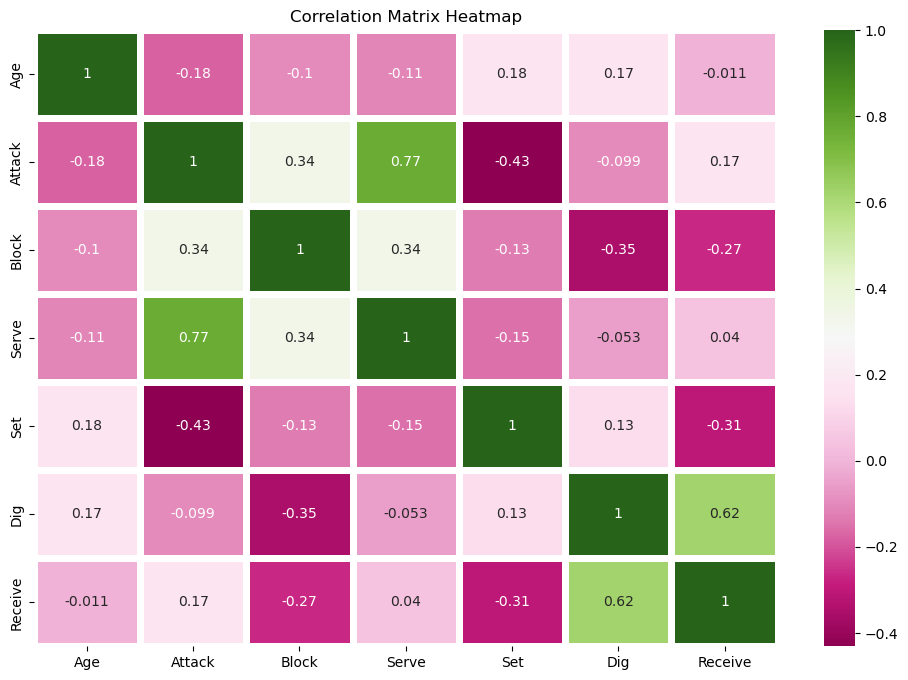

In [36]:
plt.figure(figsize=(12 , 8))
sns.heatmap(corr_matrix , annot=True , cmap="PiYG" , linewidths= 5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Here are some key observations from the results:
###### 1-> Attack & Serve (0.77): Strong positive correlation, meaning players with better attack scores also tend to have better serve            scores.
###### 2-> Dig & Receive (0.62): Moderately strong positive correlation, which makes sense since both skills involve defensive play.
###### 3-> Attack & Set (-0.43): Negative correlation, suggesting that players with strong attacking skills are less likely to have                high setting scores
###### 4-> Block & Dig (-0.34): Slight negative correlation, meaning players strong in blocking may not perform as well in digging

##### Calculating Position count

In [12]:
position_count = df['Position'].value_counts()
position_count

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

##### Distribution of Positions Through Pie Chart

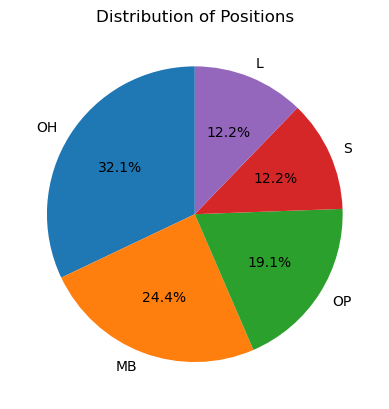

In [13]:
plt.pie(position_count , labels=position_count.index , autopct= "%1.1f%%" , startangle=90)
plt.title("Distribution of Positions")
plt.show()

##### The pie chart below represents the percentage distribution of players in each position.
###### 1-> OH (Outside Hitter): 32.1% – The largest group, showing that outside hitters are the most common position in the dataset.
###### 2-> MB (Middle Blocker): 24.4% – The second largest, reflecting the importance of this role in team composition.
###### 3-> OP (Opposite): 19.1% – Represents a significant proportion of players.
###### 4-> S (Setter): 12.2% – Fewer players compared to hitters and blockers, consistent with typical team structures.
###### 5-> L (Libero): 12.2% – Matches the setter distribution, since teams generally have one or two liberos.

##### Attack Side Of Each Country

In [14]:
avg_attack_by_country = df.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending = False)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

##### Average Attack By Country using Bar Graph

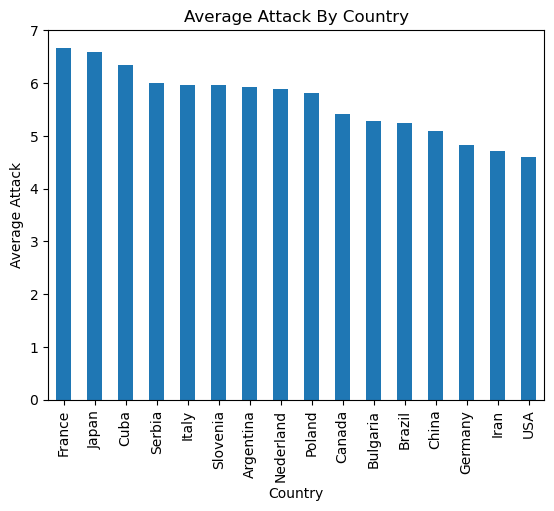

In [15]:
avg_attack_by_country.sort_values(ascending = False).plot(kind='bar')
plt.title("Average Attack By Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

##### Key Findings
###### 1-> France (6.67) – Highest average attack score among all countries, indicating strong offensive players.
###### 2-> Japan (6.59) and Cuba (6.34) – Close contenders, showing competitive attacking performance.
###### 3-> Serbia, Italy, Slovenia, and Argentina (~6.0) – Consistently high averages, forming a strong middle group.
###### 4-> USA (4.60) – Lowest among the listed countries, suggesting a relatively weaker attack rating in this dataset.

#### Average Serve According to Age

In [20]:
avg_serve_by_age = df.groupby("Age")["Serve"].mean()
avg_serve_by_age.sort_values(ascending = False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

#### Groupby

In [25]:
df.groupby(["Country" , "Position"])["Attack"].max().reset_index().sort_values(ascending=False , by = "Attack").head(20)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
27,Cuba,OH,12.33


In [27]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

#### Scatter Plot Between Block and Receive

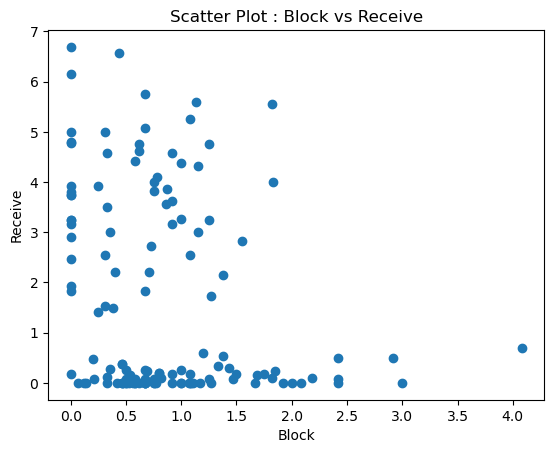

In [29]:
plt.scatter(df["Block"] , df["Receive"])
plt.title("Scatter Plot : Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

#### Key Findings From Scatter plot
##### 1-> No Strong Correlation –
######                     The data points are widely scattered without forming a clear upward or downward trend, suggesting that there                            is no strong linear relationship between "Block" and "Receive."
##### 2-> Cluster near Low Block Values –
######                              Most data points are concentrated near Block < 1.5, indicating that a majority of observations have                                     relatively low Block values.
##### 3-> Few High Block Values –
######                            There are very few data points with Block values greater than 2, and those tend to have low Receive                                     values. This could indicate that higher Block occurrences are rare.
##### 4-> Presence of Outliers –
######                       Some points with unusually high Receive values (greater than 6) might be considered outliers and could be                               investigated separately for anomalies or special cases.
##### 5-> Possible Skewed Distribution –
######                               The majority of the data is concentrated in the bottom-left part of the graph, suggesting a skewed                                      distribution for both variables.

### Boxplot for Distribution Of Serve 

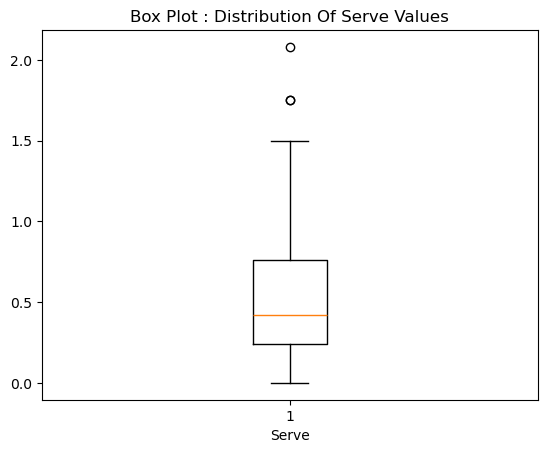

In [32]:
plt.boxplot(x = df["Serve"])
plt.title("Box Plot : Distribution Of Serve Values")
plt.xlabel("Serve")
plt.show()

#### Key Findings From Box Plot
##### 1-> Median (Central Tendency) –
######                               The median Serve value is around 0.4, which represents the typical Serve performance.
##### 2-> Interquartile Range (IQR) –
######                               The middle 50% of the data lies roughly between 0.2 and 0.75, showing a moderate spread in Serve                                        values.
##### 3-> Minimum and Maximum (Whiskers) –
######                                   The lower whisker is very close to 0, and the upper whisker extends to around 1.5, indicating                                           the overall range of typical Serve values.
##### 4-> Presence of Outliers –
######                           There are a few outliers above 1.5, going up to slightly above 2.0, suggesting some unusually high                                      Serve values that may need further investigation.
##### 5-> Consistency Observation –
######                           The relatively small IQR indicates that most Serve values are concentrated in a narrow range,                                           suggesting relatively consistent Serve performance for most observations.

### Histogram Showing Distribution of Age

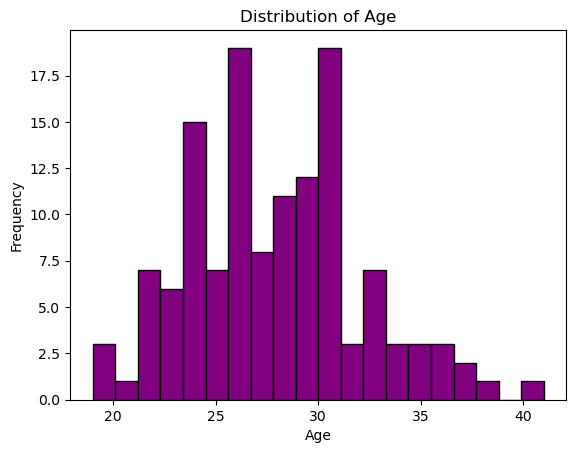

In [35]:
plt.hist(df["Age"] , bins = 20 , color= 'purple' , edgecolor = 'black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Key Findings From Histogram
##### 1-> Age Concentration:
######                       The majority of individuals fall within the 24 to 31 age range, showing that this is the most common age                                group
##### 2-> Peaks in Distribution:
######                           The highest frequencies are observed around ages 26 and 30, each reaching close to 19 individuals
##### 3-> Spread of Ages:
######                    The data covers ages ranging from about 19 to 40 years .Beyond 35 years, the frequency drops sharply, showing fewer older individuals in the dataset
##### 4-> Skewness:
######         The distribution is slightly right-skewed (positively skewed), as there are fewer individuals in the higher age groups (35–40).

### Bar Graph Representing Average Attack By Position

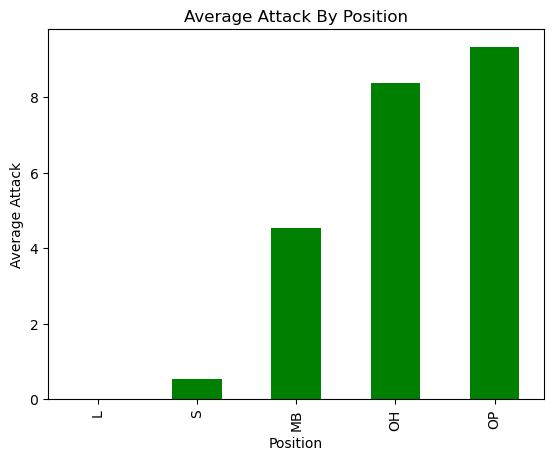

In [39]:
avg_attack_by_position = df.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending = True).plot(kind = 'bar' , color = 'green')
plt.title("Average Attack By Position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

#### Key Finding 
##### -> The data indicate that the Opposite (OP) position contributes the highest average attack, followed closely by the Outside Hitter (OH) position. 
##### -> Middle Blockers (MB) provide a moderate contribution, while Setters (S) and Liberos (L) have very low attack averages. 
##### -> These results highlight that the team’s offensive output relies primarily on OP and OH players, which may inform strategies focusing on maximizing the effectiveness of these positions.

### Serve Trend Over Age Group

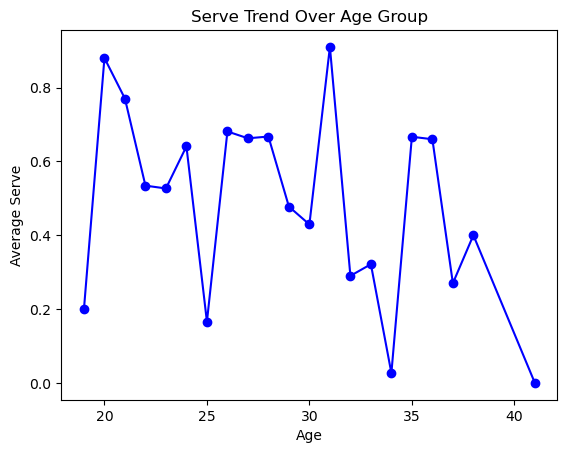

In [38]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()
serve_trend_by_age.plot(kind = "line" , marker = "o" , linestyle = "-" , color = "blue")
plt.title("Serve Trend Over Age Group")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

#### Key Finding:
##### -> The data reveal that serve performance fluctuates considerably across age groups, with noticeable peaks around ages 20, 22, and 31. 
##### -> After approximately age 35, there is a consistent downward trend in serve averages, with the lowest values observed near ages 34 and 41.
##### -> This finding suggests that serve performance is generally strongest in early adulthood and gradually declines as players get            older, potentially reflecting the impact of physical conditioning and reaction speed on serving ability.

### Total Attack and Block by Country

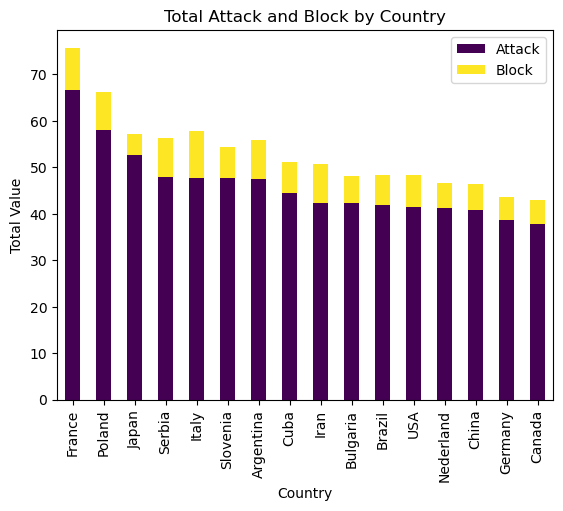

In [42]:
total_attack_block_by_country = df.groupby("Country")[["Attack" , "Block"]].sum()
total_attack_block_by_country.sort_values(ascending = False , by='Attack').plot(kind = 'bar' , stacked = True , colormap = 'viridis')
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()

#### Key Finding:
##### -> The analysis shows that France has the highest overall total value, driven primarily by its strong attack performance, followed by Poland and Japan. 
##### -> Across all teams, attack consistently makes up the majority of the total, with block contributing a smaller proportion. 
##### -> Teams like Canada and Germany show the lowest combined totals, indicating a relative gap in both offensive and defensive performance compared to the top-performing teams.

## Conclusion

#### This project demonstrates how exploratory data analysis (EDA) using Python and Pandas can uncover meaningful insights in volleyball performance data. By analyzing metrics like attack, block, and serve across different positions, teams, and age groups, we identified clear patterns: Opposite and Outside Hitter positions make the greatest contributions in attack; serving performance peaks in early adulthood and declines with age; and teams like France, Poland, and Japan outperform others in combined attack and block metrics. These findings highlight where strengths lie, and where improvements are possible—for example, strengthening block performance in lower-performing teams or emphasizing training to maintain serve effectiveness in older players. Overall, the EDA approach proves valuable as a tool for performance assessment and strategic decision-making in sports analytics.